In [1]:
#from google.colab import drive
#drive.mount("/drive")
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
#from sklearn.linear_model import LinearRegression
sns.set()

In [2]:
df= pd.read_csv("C:\\Users\\Administrator\\Desktop\\Khoaluan\\data.csv",thousands=',',skipinitialspace=True)
df.head()

,DiaChi,TinhTrangBDS,DienTich,Gia/m2,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia
0,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Đã bàn giao,50 m²,30 triệu/m²,2 phòng,NaN,NaN,1 phòng,Chung cư,Đã có sổ,NaN,Hoàn thiện cơ bản,Đông Nam,Đông,NaN,"1,5 tỷ- 50 m2đ"
1,"Đường Nguyễn Xiển, Phường Long Thạnh Mỹ, Quận ...",Đã bàn giao,34 m²,"52,35 triệu/m²",2 phòng,NaN,NaN,NaN,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,"1,78 tỷ- 34 m2đ"
2,"Lô 5, Lô 5 Khu đô thị Vĩnh Lộc, Phường Bình Hư...",Đã bàn giao,63 m²,"26,19 triệu/m²",2 phòng,NaN,NaN,2 phòng,Chung cư,Đang chờ sổ,NaN,Hoàn thiện cơ bản,NaN,NaN,NaN,"1,65 tỷ- 63 m2đ"
3,Tô Thị Hồng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,17 tỷ- 59 m2đ"
4,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Đã bàn giao,53 m²,"30,19 triệu/m²",2 phòng,NaN,NaN,1 phòng,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,"1,6 tỷ- 53 m2đ"


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29731 entries, 0 to 29730
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DiaChi            29731 non-null  object 
 1   TinhTrangBDS      27048 non-null  object 
 2   DienTich          27040 non-null  object 
 3   Gia/m2            27039 non-null  object 
 4   Phongngu          27050 non-null  object 
 5   TenPhanKhu        7542 non-null   object 
 6   SoTang            7220 non-null   float64
 7   PhongTam          26441 non-null  object 
 8   Loai              27050 non-null  object 
 9   GiayTo            20537 non-null  object 
 10  MaCanHo           3518 non-null   object 
 11  TinhTrangNoiThat  13798 non-null  object 
 12  HuongCuaChinh     10090 non-null  object 
 13  HuongBanCong      9353 non-null   object 
 14  DacDiem           5968 non-null   object 
 15  Gia               29731 non-null  object 
dtypes: float64(1), object(15)
memory usage: 

In [3]:
df

,DiaChi,TinhTrangBDS,DienTich,Gia/m2,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia
0,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Đã bàn giao,50 m²,30 triệu/m²,2 phòng,NaN,NaN,1 phòng,Chung cư,Đã có sổ,NaN,Hoàn thiện cơ bản,Đông Nam,Đông,NaN,"1,5 tỷ- 50 m2đ"
1,"Đường Nguyễn Xiển, Phường Long Thạnh Mỹ, Quận ...",Đã bàn giao,34 m²,"52,35 triệu/m²",2 phòng,NaN,NaN,NaN,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,"1,78 tỷ- 34 m2đ"
2,"Lô 5, Lô 5 Khu đô thị Vĩnh Lộc, Phường Bình Hư...",Đã bàn giao,63 m²,"26,19 triệu/m²",2 phòng,NaN,NaN,2 phòng,Chung cư,Đang chờ sổ,NaN,Hoàn thiện cơ bản,NaN,NaN,NaN,"1,65 tỷ- 63 m2đ"
3,Tô Thị Hồng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,17 tỷ- 59 m2đ"
4,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Đã bàn giao,53 m²,"30,19 triệu/m²",2 phòng,NaN,NaN,1 phòng,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,"1,6 tỷ- 53 m2đ"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29726,"Lô 11B KĐT Nam Thành Phố, Lô 11B KĐT Nam Thành...",Đã bàn giao,76 m²,"20,39 triệu/m²",2 phòng,NaN,NaN,1 phòng,Chung cư,Đã có sổ,NaN,Nội thất cao cấp,Đông,Đông Nam,Căn góc,"1,55 tỷ- 76 m2đ"
29727,"Đường Tạ Quang Bửu, Phường 5, Quận 8, Tp Hồ Ch...",Đã bàn giao,115 m²,"28,7 triệu/m²",2 phòng,A2,NaN,2 phòng,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,"3,3 tỷ- 115 m2đ"
29728,"Đường Phạm Văn Đồng, Phường 13, Quận Bình Thạn...",Đã bàn giao,82 m²,"32,32 triệu/m²",2 phòng,NaN,NaN,2 phòng,Chung cư,Đã có sổ,NaN,Nội thất đầy đủ,Đông Nam,Tây Bắc,NaN,"2,65 tỷ- 82 m2đ"
29729,Đường Nguyễn Thiện Thuật,Đã bàn giao,40 m²,"46,25 triệu/m²",1 phòng,NaN,NaN,NaN,Chung cư,NaN,NaN,NaN,NaN,NaN,NaN,"1,85 tỷ- 40 m2đ"


In [7]:
nan_values = df.isna()
nan_columns = nan_values.any()
columns_with_nan = df.columns[nan_columns].tolist()
columns_with_nan

['TinhTrangBDS',
 'DienTich',
 'Gia/m2',
 'Phongngu',
 'TenPhanKhu',
 'SoTang',
 'PhongTam',
 'Loai',
 'GiayTo',
 'MaCanHo',
 'TinhTrangNoiThat',
 'HuongCuaChinh',
 'HuongBanCong',
 'DacDiem']

In [8]:
df.isna().sum()/df.shape[0]*100

DiaChi               0.000000
TinhTrangBDS         9.024251
DienTich             9.051159
Gia/m2               9.054522
Phongngu             9.017524
TenPhanKhu          74.632538
SoTang              75.715583
PhongTam            11.065891
Loai                 9.017524
GiayTo              30.923951
MaCanHo             88.167233
TinhTrangNoiThat    53.590528
HuongCuaChinh       66.062359
HuongBanCong        68.541253
DacDiem             79.926676
Gia                  0.000000
dtype: float64

In [10]:
## Mình sẽ chỉ lấy những data có dữ liệu về diện tích 
df1 = df[df.DienTich.notnull()]
df1 = df1.reset_index()
for i in range(0,len(df1.DienTich)):
    df1.DienTich[i]= df1.DienTich[i].split(' ')[0]
## Có thể thấy 2 trường dữ liệu Gia/m2 và Gia tương đương nhau nên mình sẽ xóa trường này đi
del df1["Gia/m2"]

In [13]:
## Mình sẽ chỉ lấy những data có dữ liệu về phòng ngủ 
df2 = df1[df1.Phongngu.notnull()]
for i in range(0,len(df2.Phongngu)):
    if 'nhiều hơn' in df2.Phongngu[i]:
        df2.Phongngu[i]= float(df2.Phongngu[i].split(' ')[2])+1
    else:
        df2.Phongngu[i]= df2.Phongngu[i].split(' ')[0]
df2

,index,DiaChi,TinhTrangBDS,DienTich,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia
0,0,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Đã bàn giao,50,2,NaN,NaN,1 phòng,Chung cư,Đã có sổ,NaN,Hoàn thiện cơ bản,Đông Nam,Đông,NaN,"1,5 tỷ- 50 m2đ"
1,1,"Đường Nguyễn Xiển, Phường Long Thạnh Mỹ, Quận ...",Đã bàn giao,34,2,NaN,NaN,NaN,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,"1,78 tỷ- 34 m2đ"
2,2,"Lô 5, Lô 5 Khu đô thị Vĩnh Lộc, Phường Bình Hư...",Đã bàn giao,63,2,NaN,NaN,2 phòng,Chung cư,Đang chờ sổ,NaN,Hoàn thiện cơ bản,NaN,NaN,NaN,"1,65 tỷ- 63 m2đ"
3,4,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Đã bàn giao,53,2,NaN,NaN,1 phòng,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,"1,6 tỷ- 53 m2đ"
4,10,"Đường Phạm Văn Đồng, Phường Linh Tây, Quận Thủ...",Đã bàn giao,75,2,NaN,NaN,2 phòng,Chung cư,NaN,NaN,NaN,NaN,NaN,NaN,"1,85 tỷ- 75 m2đ"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27035,29726,"Lô 11B KĐT Nam Thành Phố, Lô 11B KĐT Nam Thành...",Đã bàn giao,76,2,NaN,NaN,1 phòng,Chung cư,Đã có sổ,NaN,Nội thất cao cấp,Đông,Đông Nam,Căn góc,"1,55 tỷ- 76 m2đ"
27036,29727,"Đường Tạ Quang Bửu, Phường 5, Quận 8, Tp Hồ Ch...",Đã bàn giao,115,2,A2,NaN,2 phòng,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,"3,3 tỷ- 115 m2đ"
27037,29728,"Đường Phạm Văn Đồng, Phường 13, Quận Bình Thạn...",Đã bàn giao,82,2,NaN,NaN,2 phòng,Chung cư,Đã có sổ,NaN,Nội thất đầy đủ,Đông Nam,Tây Bắc,NaN,"2,65 tỷ- 82 m2đ"
27038,29729,Đường Nguyễn Thiện Thuật,Đã bàn giao,40,1,NaN,NaN,NaN,Chung cư,NaN,NaN,NaN,NaN,NaN,NaN,"1,85 tỷ- 40 m2đ"


In [16]:
## Mình sẽ chỉ lấy những data có dữ liệu về phòng tắm
df3 = df2[df2.PhongTam.notnull()]
df3 = df3.reset_index()
for i in range(0,len(df3.PhongTam)):
    if 'Nhiều hơn' in df3.PhongTam[i]:
        df3.PhongTam[i]= float(df3.PhongTam[i].split(' ')[2])+1
    else:
        df3.PhongTam[i]= df3.PhongTam[i].split(' ')[0]
df3
        


,level_0,index,DiaChi,TinhTrangBDS,DienTich,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia
0,0,0,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Đã bàn giao,50,2,NaN,NaN,1,Chung cư,Đã có sổ,NaN,Hoàn thiện cơ bản,Đông Nam,Đông,NaN,"1,5 tỷ- 50 m2đ"
1,2,2,"Lô 5, Lô 5 Khu đô thị Vĩnh Lộc, Phường Bình Hư...",Đã bàn giao,63,2,NaN,NaN,2,Chung cư,Đang chờ sổ,NaN,Hoàn thiện cơ bản,NaN,NaN,NaN,"1,65 tỷ- 63 m2đ"
2,3,4,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Đã bàn giao,53,2,NaN,NaN,1,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,"1,6 tỷ- 53 m2đ"
3,4,10,"Đường Phạm Văn Đồng, Phường Linh Tây, Quận Thủ...",Đã bàn giao,75,2,NaN,NaN,2,Chung cư,NaN,NaN,NaN,NaN,NaN,NaN,"1,85 tỷ- 75 m2đ"
4,5,11,"Số 8, Số 8 Đường Gò Dưa, Phường Hiệp Bình Phướ...",Đã bàn giao,57.72,2,A,NaN,2,Chung cư,Đã có sổ,NaN,Hoàn thiện cơ bản,NaN,NaN,NaN,"1,75 tỷ- 57.72 m2đ"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26426,27033,29724,"Đường Xa lộ Hà Nội, Phường Hiệp Phú, Quận 9, T...",Đã bàn giao,53,2,B,19.0,1,Chung cư,Đang chờ sổ,14,Hoàn thiện cơ bản,NaN,Tây Nam,NaN,"2,1 tỷ- 53 m2đ"
26427,27035,29726,"Lô 11B KĐT Nam Thành Phố, Lô 11B KĐT Nam Thành...",Đã bàn giao,76,2,NaN,NaN,1,Chung cư,Đã có sổ,NaN,Nội thất cao cấp,Đông,Đông Nam,Căn góc,"1,55 tỷ- 76 m2đ"
26428,27036,29727,"Đường Tạ Quang Bửu, Phường 5, Quận 8, Tp Hồ Ch...",Đã bàn giao,115,2,A2,NaN,2,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,"3,3 tỷ- 115 m2đ"
26429,27037,29728,"Đường Phạm Văn Đồng, Phường 13, Quận Bình Thạn...",Đã bàn giao,82,2,NaN,NaN,2,Chung cư,Đã có sổ,NaN,Nội thất đầy đủ,Đông Nam,Tây Bắc,NaN,"2,65 tỷ- 82 m2đ"


In [17]:
#Mình sẽ chỉ lấy những data có dữ liệu về loại chung cư
del df3['level_0']
del df3['index']
df4 = df3[df3.Loai.notnull()]
df4

,DiaChi,TinhTrangBDS,DienTich,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia
0,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Đã bàn giao,50,2,NaN,NaN,1,Chung cư,Đã có sổ,NaN,Hoàn thiện cơ bản,Đông Nam,Đông,NaN,"1,5 tỷ- 50 m2đ"
1,"Lô 5, Lô 5 Khu đô thị Vĩnh Lộc, Phường Bình Hư...",Đã bàn giao,63,2,NaN,NaN,2,Chung cư,Đang chờ sổ,NaN,Hoàn thiện cơ bản,NaN,NaN,NaN,"1,65 tỷ- 63 m2đ"
2,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Đã bàn giao,53,2,NaN,NaN,1,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,"1,6 tỷ- 53 m2đ"
3,"Đường Phạm Văn Đồng, Phường Linh Tây, Quận Thủ...",Đã bàn giao,75,2,NaN,NaN,2,Chung cư,NaN,NaN,NaN,NaN,NaN,NaN,"1,85 tỷ- 75 m2đ"
4,"Số 8, Số 8 Đường Gò Dưa, Phường Hiệp Bình Phướ...",Đã bàn giao,57.72,2,A,NaN,2,Chung cư,Đã có sổ,NaN,Hoàn thiện cơ bản,NaN,NaN,NaN,"1,75 tỷ- 57.72 m2đ"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26426,"Đường Xa lộ Hà Nội, Phường Hiệp Phú, Quận 9, T...",Đã bàn giao,53,2,B,19.0,1,Chung cư,Đang chờ sổ,14,Hoàn thiện cơ bản,NaN,Tây Nam,NaN,"2,1 tỷ- 53 m2đ"
26427,"Lô 11B KĐT Nam Thành Phố, Lô 11B KĐT Nam Thành...",Đã bàn giao,76,2,NaN,NaN,1,Chung cư,Đã có sổ,NaN,Nội thất cao cấp,Đông,Đông Nam,Căn góc,"1,55 tỷ- 76 m2đ"
26428,"Đường Tạ Quang Bửu, Phường 5, Quận 8, Tp Hồ Ch...",Đã bàn giao,115,2,A2,NaN,2,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,"3,3 tỷ- 115 m2đ"
26429,"Đường Phạm Văn Đồng, Phường 13, Quận Bình Thạn...",Đã bàn giao,82,2,NaN,NaN,2,Chung cư,Đã có sổ,NaN,Nội thất đầy đủ,Đông Nam,Tây Bắc,NaN,"2,65 tỷ- 82 m2đ"


In [18]:
df4.isna().sum()/df.shape[0]*100

DiaChi               0.000000
TinhTrangBDS         0.006727
DienTich             0.000000
Phongngu             0.000000
TenPhanKhu          63.701187
SoTang              64.801049
PhongTam             0.000000
Loai                 0.000000
GiayTo              20.931015
MaCanHo             77.145067
TinhTrangNoiThat    43.019071
HuongCuaChinh       55.104100
HuongBanCong        57.556086
DacDiem             69.072685
Gia                  0.000000
dtype: float64

In [20]:
## truc quan truong gia tri Gia

for i in range(0,len(df4.Gia)):
    
    if 'GIÁ TỐT' in df4.Gia[i]:
        df4.Gia[i] = df4.Gia[i].split('\n')[0]
    else:
        df4.Gia[i] = df4.Gia[i].split('-')[0]
df4

,DiaChi,TinhTrangBDS,DienTich,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia
0,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Đã bàn giao,50,2,NaN,NaN,1,Chung cư,Đã có sổ,NaN,Hoàn thiện cơ bản,Đông Nam,Đông,NaN,"1,5 tỷ"
1,"Lô 5, Lô 5 Khu đô thị Vĩnh Lộc, Phường Bình Hư...",Đã bàn giao,63,2,NaN,NaN,2,Chung cư,Đang chờ sổ,NaN,Hoàn thiện cơ bản,NaN,NaN,NaN,"1,65 tỷ"
2,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Đã bàn giao,53,2,NaN,NaN,1,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,"1,6 tỷ"
3,"Đường Phạm Văn Đồng, Phường Linh Tây, Quận Thủ...",Đã bàn giao,75,2,NaN,NaN,2,Chung cư,NaN,NaN,NaN,NaN,NaN,NaN,"1,85 tỷ"
4,"Số 8, Số 8 Đường Gò Dưa, Phường Hiệp Bình Phướ...",Đã bàn giao,57.72,2,A,NaN,2,Chung cư,Đã có sổ,NaN,Hoàn thiện cơ bản,NaN,NaN,NaN,"1,75 tỷ"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26426,"Đường Xa lộ Hà Nội, Phường Hiệp Phú, Quận 9, T...",Đã bàn giao,53,2,B,19.0,1,Chung cư,Đang chờ sổ,14,Hoàn thiện cơ bản,NaN,Tây Nam,NaN,"2,1 tỷ"
26427,"Lô 11B KĐT Nam Thành Phố, Lô 11B KĐT Nam Thành...",Đã bàn giao,76,2,NaN,NaN,1,Chung cư,Đã có sổ,NaN,Nội thất cao cấp,Đông,Đông Nam,Căn góc,"1,55 tỷ"
26428,"Đường Tạ Quang Bửu, Phường 5, Quận 8, Tp Hồ Ch...",Đã bàn giao,115,2,A2,NaN,2,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,"3,3 tỷ"
26429,"Đường Phạm Văn Đồng, Phường 13, Quận Bình Thạn...",Đã bàn giao,82,2,NaN,NaN,2,Chung cư,Đã có sổ,NaN,Nội thất đầy đủ,Đông Nam,Tây Bắc,NaN,"2,65 tỷ"


In [21]:
#chuyen string thanh gia tri thuc
for i in range(0,len(df4.Gia)):
    if 'tỷ' in df4.Gia[i]:
        price = df4.Gia[i].split(' ')[0]
        price = price.replace(',','.')
        df4.Gia[i] = round(float(price)*1000000000,1)
    elif 'triệu' in df4.Gia[i] :
        price = df4.Gia[i].split(' ')[0]
        price = price.replace(',','.')
        df4.Gia[i] = round(float(price)*1000000,1)
print(len(df4.Gia))  
df4 = df4.drop([17284])
df4 = df4.reset_index()
#df4.to_csv('/drive/My Drive/united2.csv',encoding="utf-8-sig",index=False)
df4
#for i in range(0,len(df4.Gia)):
#   print(df4.Gia[i])

26431


,index,DiaChi,TinhTrangBDS,DienTich,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia
0,0,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Đã bàn giao,50,2,NaN,NaN,1,Chung cư,Đã có sổ,NaN,Hoàn thiện cơ bản,Đông Nam,Đông,NaN,1500000000.0
1,1,"Lô 5, Lô 5 Khu đô thị Vĩnh Lộc, Phường Bình Hư...",Đã bàn giao,63,2,NaN,NaN,2,Chung cư,Đang chờ sổ,NaN,Hoàn thiện cơ bản,NaN,NaN,NaN,1650000000.0
2,2,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Đã bàn giao,53,2,NaN,NaN,1,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,1600000000.0
3,3,"Đường Phạm Văn Đồng, Phường Linh Tây, Quận Thủ...",Đã bàn giao,75,2,NaN,NaN,2,Chung cư,NaN,NaN,NaN,NaN,NaN,NaN,1850000000.0
4,4,"Số 8, Số 8 Đường Gò Dưa, Phường Hiệp Bình Phướ...",Đã bàn giao,57.72,2,A,NaN,2,Chung cư,Đã có sổ,NaN,Hoàn thiện cơ bản,NaN,NaN,NaN,1750000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26425,26426,"Đường Xa lộ Hà Nội, Phường Hiệp Phú, Quận 9, T...",Đã bàn giao,53,2,B,19.0,1,Chung cư,Đang chờ sổ,14,Hoàn thiện cơ bản,NaN,Tây Nam,NaN,2100000000.0
26426,26427,"Lô 11B KĐT Nam Thành Phố, Lô 11B KĐT Nam Thành...",Đã bàn giao,76,2,NaN,NaN,1,Chung cư,Đã có sổ,NaN,Nội thất cao cấp,Đông,Đông Nam,Căn góc,1550000000.0
26427,26428,"Đường Tạ Quang Bửu, Phường 5, Quận 8, Tp Hồ Ch...",Đã bàn giao,115,2,A2,NaN,2,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,3300000000.0
26428,26429,"Đường Phạm Văn Đồng, Phường 13, Quận Bình Thạn...",Đã bàn giao,82,2,NaN,NaN,2,Chung cư,Đã có sổ,NaN,Nội thất đầy đủ,Đông Nam,Tây Bắc,NaN,2650000000.0


In [22]:
#them cot quan
df4['Quan'] = df.DiaChi.copy()
for i in range(0,len(df4.DiaChi)):
    a= df4.DiaChi[i].split(',')
    df4['Quan'][i] = a[len(a)-2]
for i in df4['Quan']:
    if 'Quận' not in i and 'Huyện' not in i:
        df4 = df4.drop(df4[df4['Quan']==i].index)

In [23]:
df4.Quan.unique()

array([' Quận 9', ' Quận Bình Tân', ' Quận Thủ Đức', ' Quận 12',
       ' Quận 8', ' Quận Bình Thạnh', ' Huyện Bình Chánh', ' Quận 7',
       ' Quận Tân Bình', ' Huyện Nhà Bè', ' Quận Tân Phú', ' Quận 6',
       ' Quận 2', ' Quận 4', ' Quận Gò Vấp', ' Quận 5', ' Quận 1',
       ' Quận Phú Nhuận', ' Huyện Hóc Môn', ' Quận 10', ' Quận 3',
       ' Quận 11', ' Huyện Củ Chi'], dtype=object)

In [24]:
df4

,index,DiaChi,TinhTrangBDS,DienTich,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia,Quan
0,0,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Đã bàn giao,50,2,NaN,NaN,1,Chung cư,Đã có sổ,NaN,Hoàn thiện cơ bản,Đông Nam,Đông,NaN,1500000000.0,Quận 9
1,1,"Lô 5, Lô 5 Khu đô thị Vĩnh Lộc, Phường Bình Hư...",Đã bàn giao,63,2,NaN,NaN,2,Chung cư,Đang chờ sổ,NaN,Hoàn thiện cơ bản,NaN,NaN,NaN,1650000000.0,Quận Bình Tân
2,2,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Đã bàn giao,53,2,NaN,NaN,1,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,1600000000.0,Quận 9
3,3,"Đường Phạm Văn Đồng, Phường Linh Tây, Quận Thủ...",Đã bàn giao,75,2,NaN,NaN,2,Chung cư,NaN,NaN,NaN,NaN,NaN,NaN,1850000000.0,Quận Thủ Đức
4,4,"Số 8, Số 8 Đường Gò Dưa, Phường Hiệp Bình Phướ...",Đã bàn giao,57.72,2,A,NaN,2,Chung cư,Đã có sổ,NaN,Hoàn thiện cơ bản,NaN,NaN,NaN,1750000000.0,Quận Thủ Đức
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26425,26426,"Đường Xa lộ Hà Nội, Phường Hiệp Phú, Quận 9, T...",Đã bàn giao,53,2,B,19.0,1,Chung cư,Đang chờ sổ,14,Hoàn thiện cơ bản,NaN,Tây Nam,NaN,2100000000.0,Quận 9
26426,26427,"Lô 11B KĐT Nam Thành Phố, Lô 11B KĐT Nam Thành...",Đã bàn giao,76,2,NaN,NaN,1,Chung cư,Đã có sổ,NaN,Nội thất cao cấp,Đông,Đông Nam,Căn góc,1550000000.0,Huyện Bình Chánh
26427,26428,"Đường Tạ Quang Bửu, Phường 5, Quận 8, Tp Hồ Ch...",Đã bàn giao,115,2,A2,NaN,2,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,3300000000.0,Quận 8
26428,26429,"Đường Phạm Văn Đồng, Phường 13, Quận Bình Thạn...",Đã bàn giao,82,2,NaN,NaN,2,Chung cư,Đã có sổ,NaN,Nội thất đầy đủ,Đông Nam,Tây Bắc,NaN,2650000000.0,Quận Bình Thạnh


In [25]:
frame = df4[['DiaChi','Quan','TinhTrangBDS','DienTich','Phongngu','TenPhanKhu','SoTang','PhongTam','Loai','GiayTo','MaCanHo'
             ,'TinhTrangNoiThat' ,'HuongCuaChinh','HuongBanCong','DacDiem',"Gia"]]
frame.head(2)

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia
0,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Quận 9,Đã bàn giao,50,2,NaN,NaN,1,Chung cư,Đã có sổ,NaN,Hoàn thiện cơ bản,Đông Nam,Đông,NaN,1500000000.0
1,"Lô 5, Lô 5 Khu đô thị Vĩnh Lộc, Phường Bình Hư...",Quận Bình Tân,Đã bàn giao,63,2,NaN,NaN,2,Chung cư,Đang chờ sổ,NaN,Hoàn thiện cơ bản,NaN,NaN,NaN,1650000000.0


In [26]:
frame.DienTich = frame.DienTich.astype('float')
frame.Phongngu = frame.Phongngu.astype('float') 
frame.PhongTam = frame.PhongTam.astype('float') 
frame.Gia = frame.Gia.astype('float') 
frame.describe()

,DienTich,Phongngu,SoTang,PhongTam,Gia
count,26136.000000,26136.000000,7039.000000,26136.000000,2.613600e+04
mean,218.358106,2.027127,11.330587,1.731558,2.756281e+09
std,9545.739259,0.741453,14.896840,0.610244,7.593491e+09
min,1.000000,1.000000,1.000000,1.000000,1.000000e+06
25%,55.000000,2.000000,5.000000,1.000000,1.600000e+09
50%,66.660000,2.000000,9.000000,2.000000,2.100000e+09
75%,78.000000,2.000000,16.000000,2.000000,3.150000e+09
max,1000000.000000,11.000000,720.000000,7.000000,9.800000e+11


In [30]:
frame['USD'] = round(frame['Gia']/24000,0)
rows  = frame[frame.DienTich > 500]
frame = frame.drop(index = rows.index)
rows  = frame[frame.SoTang > 81]
frame = frame.drop(index = rows.index)
frame['log_price'] = np.log(frame.USD)

print("The number of row after cleaning data:",len(frame))

The number of row after cleaning data: 26068


In [31]:
frame.to_csv('C:\\Users\\Administrator\\Desktop\\Khoaluan\\dataclean.csv',encoding="utf-8-sig",index=False)

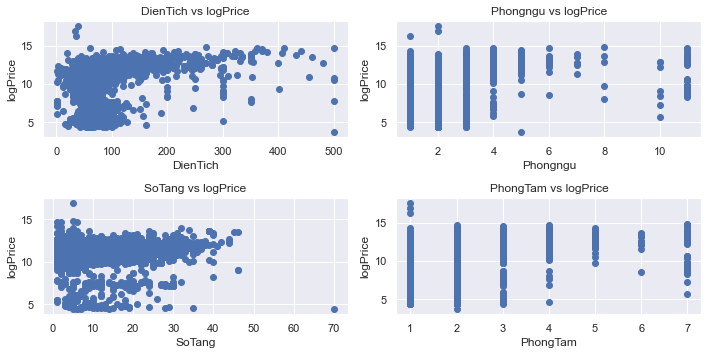

In [33]:
#Trực quan dữ liệu
#2.1 Trực quan những giá trị dạng số
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(frame[x],frame['log_price'])
    plt.title(x+' vs logPrice')
    plt.ylabel('logPrice')
    plt.xlabel(x)


plt.figure(figsize=(10,12))

scatter('DienTich', 1)
scatter('Phongngu', 2)
scatter('SoTang', 3)
scatter('PhongTam', 4)

plt.tight_layout()

In [34]:
#2.2 Trực quan những giá categorical
frame1 = frame[['Quan','TinhTrangBDS','TenPhanKhu','Loai','GiayTo','MaCanHo','TinhTrangNoiThat','HuongCuaChinh','HuongBanCong'
                ,'DacDiem','Gia','USD']]
bins = [42,67917,106250,40833333]

In [35]:
def Analyst(col):
    temp = frame1.copy()
    table = temp.groupby([col])['USD'].mean()
    temp = temp.merge(table.reset_index(), how='left',on=col)
    cars_bin=['low','Medium','High']
    frame1['range'] = pd.cut(temp['USD_y'],bins,right=False,labels=cars_bin)
    plt.rcParams['figure.figsize'] = (18, 8)
    df = pd.DataFrame(frame1.groupby([col,'range'])['USD'].mean().unstack(fill_value=0))
    df.plot.bar()
    plt.title('house Range vs Price')
    plt.show()

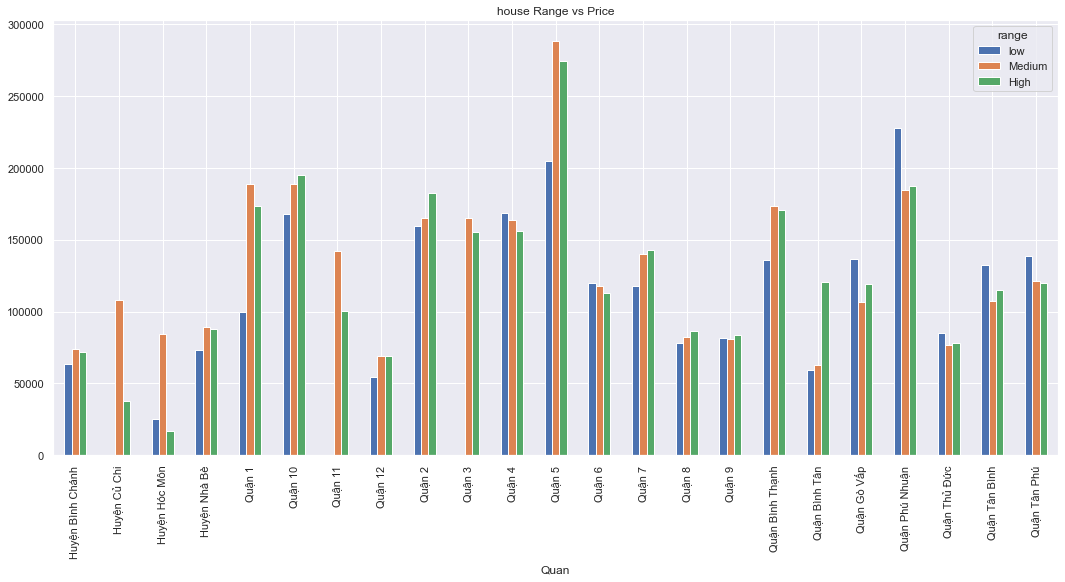

In [36]:

Analyst('Quan')

Quận 5 , Quận 10, Quận 1 , Quận Phú Nhuận là những quận có giá chung cư cao nhất

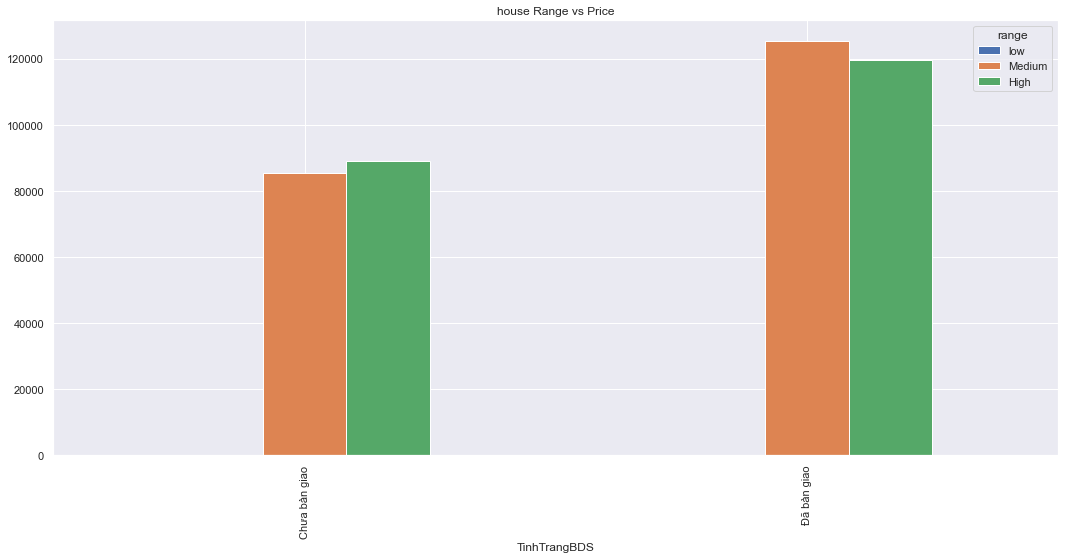

In [37]:
Analyst('TinhTrangBDS')


Có thể thấy những chung cư đã được bàn giao có giá cao hơn so với chưa được bàn giao

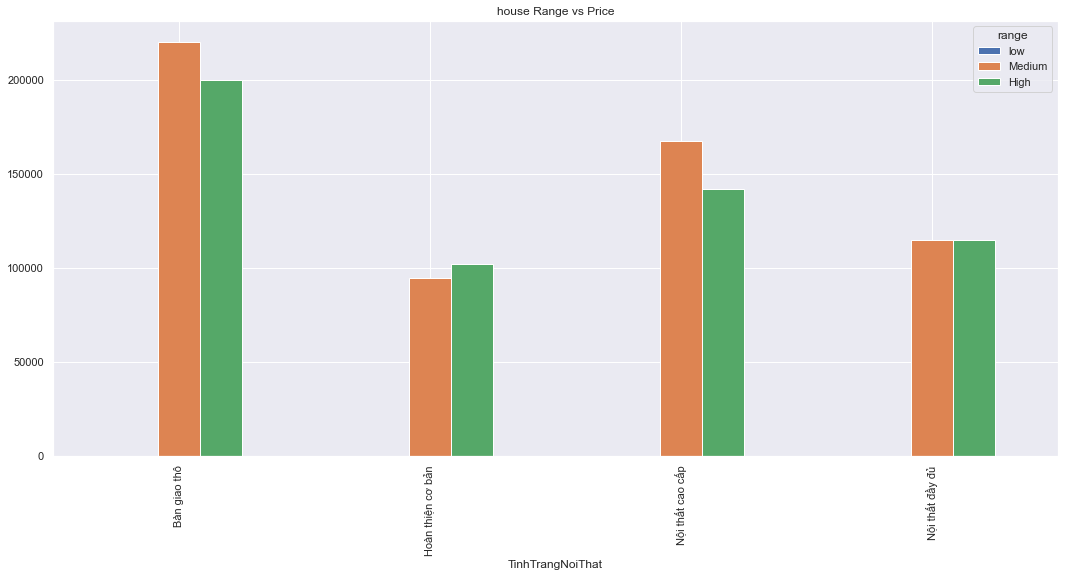

In [38]:

Analyst('TinhTrangNoiThat')

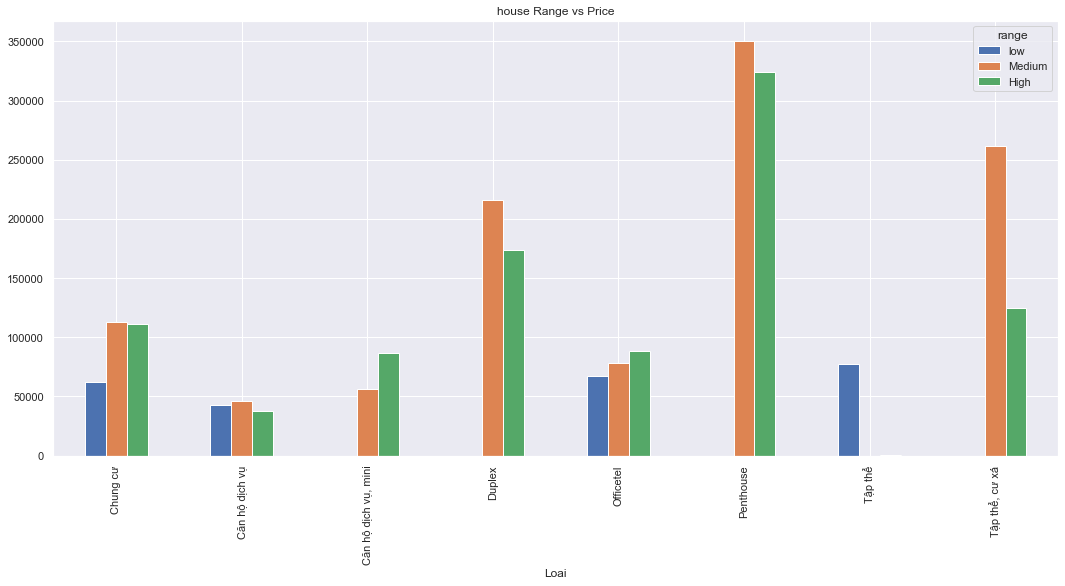

In [39]:
Analyst('Loai')

In [41]:
test = frame1[frame1.USD <frame1.USD.quantile(0.8)]

Đông Nam    1761
Đông         983
Tây Nam      806
Bắc          787
Đông Bắc     762
Tây Bắc      688
Tây          684
Nam          667
Name: HuongBanCong, dtype: int64


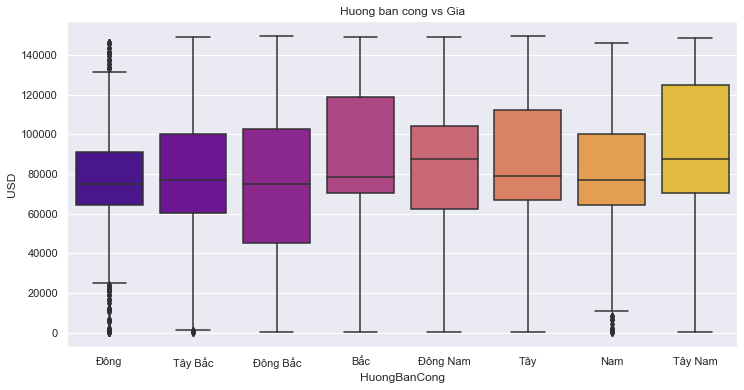

Đông Nam    1557
Tây Bắc     1309
Nam         1104
Đông Bắc    1017
Đông         875
Tây Nam      643
Tây          521
Bắc          490
Name: HuongCuaChinh, dtype: int64


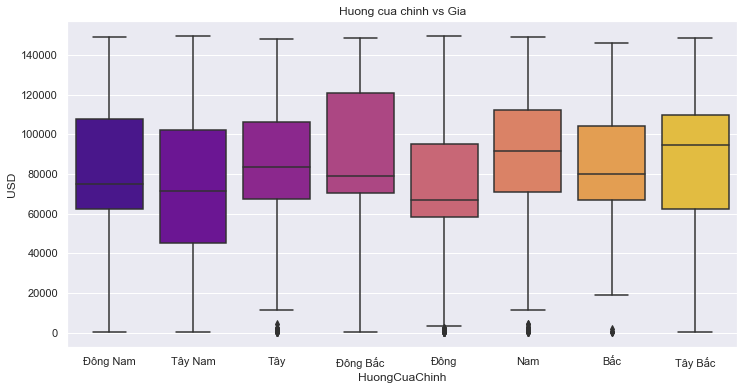

Chung cư                19346
Căn hộ dịch vụ, mini      630
Officetel                 393
Duplex                    211
Căn hộ dịch vụ            120
Penthouse                  76
Tập thể, cư xá             47
Tập thể                     2
Name: Loai, dtype: int64


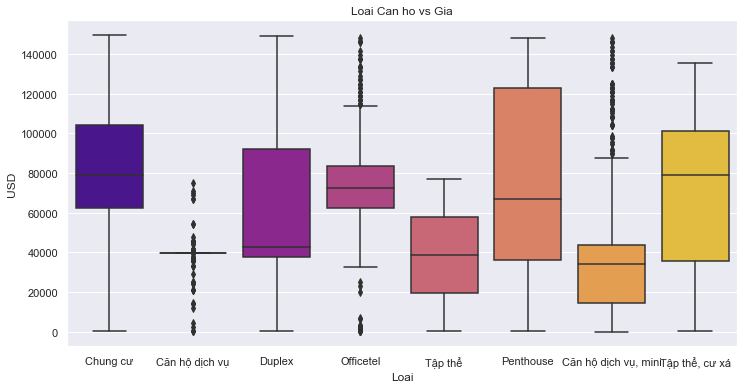

Đã có sổ        7481
Đang chờ sổ     6645
Giấy tờ khác    1701
Name: GiayTo, dtype: int64


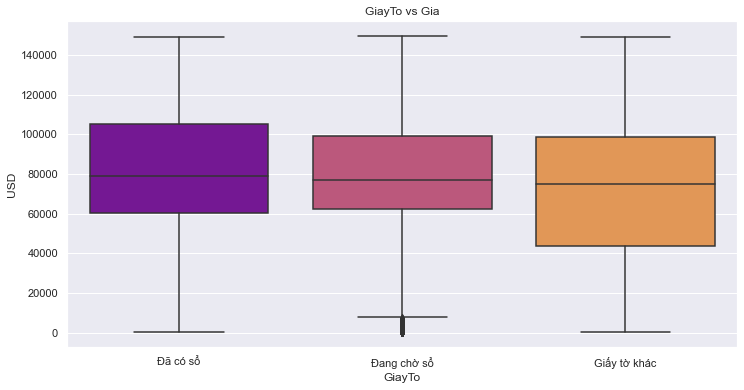

In [42]:
plt.rcParams['figure.figsize'] = (12, 6)

print(test.HuongBanCong.value_counts())
sns.boxplot(x=test.HuongBanCong, y=test.USD, palette=("plasma"))
plt.title('Huong ban cong vs Gia')
plt.show()

print(test.HuongCuaChinh.value_counts())
sns.boxplot(x=test.HuongCuaChinh, y=test.USD, palette=("plasma"))
plt.title('Huong cua chinh vs Gia')
plt.show()

print(test.Loai.value_counts())
sns.boxplot(x=test.Loai, y=test.USD, palette=("plasma"))
plt.title('Loai Can ho vs Gia')
plt.show()

print(test.GiayTo.value_counts())
sns.boxplot(x=test.GiayTo, y=test.USD, palette=("plasma"))
plt.title('GiayTo vs Gia')
plt.show()